# 최근접 이웃(K-Nearest Neighbor)
1. New Data와 모든 Train Set사이의 거리 측정
2. 유클리드 거리가 가까운 순으로 K개의 점을 이웃으로 갖는다.
3. K의 개의 점들중 가장 많이 속한 Class 를 찾는다.
4. NewData를 새로운 Class 에 할당한다.

## K 란 ?
- 이웃의 or 주변 데이터의 개수
- K 는 홀수로 설정 하는걸 추전
- K 값이 너무 작은경우 : 민감도가 높아서 잘못 예측할 확률이 높아짐 (overfitting)
- K 값이 너무 큰경우 : 분류나 예측 자체가 둔감해지기 때문에 결과가 좋지 않음 (underfitting)
- 기본값을 이용해 적절하게 찾아 나간다.(default=5)

## P_value
- 이웃 선택의 기준이 되는 거리 계산법
- Minkowski 거리법을 사용한다. 

## 주의
- 변수 값 범위 재조정
    - 각 feature 의 단위가 다르기 때문에 거리 측정시에 범위를 재조정 해줘야 한다.
    - 물렁도, 크기의 단위는 서로 다르기 때문에 같은 거리 측정 방식을 사용하면 안된다.

[모델 종류]
- KNeighborsClassifier() : Classification model
    - [참고](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier)
- KNeighborsRegressor : Regression Model
    - [참고](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn-neighbors-kneighborsregressor)

# KNeighborsClassifier() : Classification model
- n_neighbors : int
    - 이웃의 수인 K를 결정한다. default = 5 
- weights : {'uniform', 'distance'} or callable
    - 예측에 사용되는 가중 방법을 결정한다. default는 uniform이다. 
    - 'uniform' : 각각의 이웃이 모두 동일한 가중치를 갖는다. 
    - 'distance' : 거리가 가까울수록 더 높은 가중치를 가져 더 큰 영향을 미치게 된다.
    - callable : 사용자가 직접 정의한 함수를 사용할 수도 있다. 거리가 저장된 배열을 입력으로 받고 가중치가 저장된 배열을 반환하는 함수가 되어야 한다. 
-  algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'} 
    - 가장 가까운 이웃들을 계산하는 데 사용하는 알고리즘을 결정한다. default는 auto이다. 
    - 'auto' : 입력된 훈련 데이터에 기반하여 가장 적절한 알고리즘을 사용한다. 
    - 'ball_tree' : Ball-Tree 구조를 사용한다. (Ball-Tree 설명 : https://nobilitycat.tistory.com/entry/ball-tree)
    - 'kd_tree' : KD-Tree 구조를 사용한다.
    - 'brute' : Brute-Force 탐색을 사용한다. 
- leaf_size : int
    - Ball-Tree나 KD-Tree의 leaf size를 결정한다. default값은 30이다.
    - 이는 트리를 저장하기 위한 메모리뿐만 아니라, 트리의 구성과 쿼리 처리의 속도에도 영향을 미친다. 
- p : int
    - 민코프스키 미터법(Minkowski)의 차수를 결정한다. 예를 들어 p = 1이면 맨해튼 거리(Manhatten distance), p = 2이면 유클리드 거리(Euclidean distance)이다. 

In [ ]:
#!pip install threadpoolctl==3.1.0
#!pip install lazypredict
#AttributeError: 'NoneType' object has no attribute 'split' 에러 발생시

In [1]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

/var/folders/c2/h79928n92258kzkwtzbxjbj80000gn/T/ipykernel_67257/2441446269.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [3]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import fetch_california_housing #load_boston
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.manifold import TSNE

In [4]:
import warnings
warnings.filterwarnings("ignore")

## K 최근접 이웃 분류
- 학습 과정 : Train Data Set을 저장
- k개의 데이터중 거리를 기준으로 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [5]:
iris = load_iris()

In [6]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
x, y = load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [8]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [9]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.9666666666666667
Test Data Score: 0.9666666666666667


In [10]:
model = KNeighborsClassifier()
model.fit(x_train_scale, y_train)

print(f'Train Data Score: {model.score(x_train_scale, y_train)}')
print(f'Test Data Score: {model.score(x_test_scale, y_test)}')

Train Data Score: 0.975
Test Data Score: 0.9333333333333333


In [11]:
cross_validate(estimator = KNeighborsClassifier(), 
               X=x, y=y, cv=5, 
               n_jobs=multiprocessing.cpu_count())

{'fit_time': array([0.00044894, 0.000561  , 0.00043201, 0.00046897, 0.00039005]),
 'score_time': array([0.00091386, 0.00109386, 0.00089097, 0.00132489, 0.00079393]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [12]:
param_grid = [{'n_neighbors':[3,5,7],
               'weights': ['uniform', 'distance'],
               'algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [13]:
gs = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose = True 
)

In [14]:
gs.fit(x,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=8,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [15]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [16]:
print(f'GridSearchCV best score: {gs.best_score_}')

GridSearchCV best score: 0.9800000000000001


In [17]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)
  return out

In [18]:
# 2차원으로 차원축소후 KNeighborsClassifier 를 이용해 학습 결과를 확인해 보자. 
tsne = TSNE(n_components=2) 
x_comp = tsne.fit_transform(x)

In [19]:
iris_comp_df = pd.DataFrame(data=x_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,-23.875437,-1.430589,0
1,-21.332832,-2.522965,0
2,-21.183956,-1.316485,0
3,-20.842545,-1.611920,0
4,-23.845785,-0.945733,0
...,...,...,...
145,15.408048,-1.407380,2
146,12.035444,-1.459038,2
147,14.410233,-1.398059,2
148,15.347630,-3.389599,2


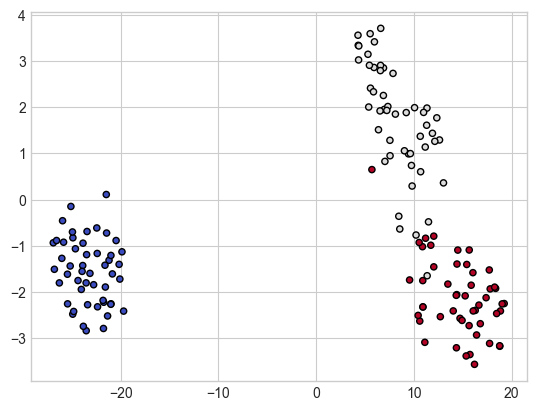

In [20]:
plt.scatter(x_comp[:, 0], x_comp[:, 1],
            c=y, 
            cmap = plt.cm.coolwarm,
            s=20, edgecolors='k')

In [21]:
# 2차원 데이터로 학습
model = KNeighborsClassifier()
model.fit(x_comp, y)
predict = model.predict(x_comp)

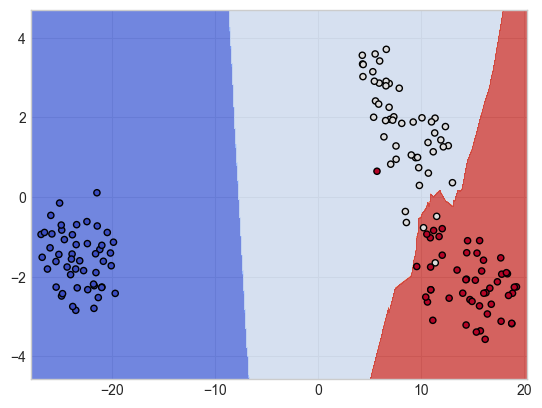

In [22]:
xx, yy = make_meshgrid(x_comp[:, 0], x_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=.8)
plt.scatter(x_comp[:, 0], x_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

### 유방암 데이터

In [107]:
cancer = load_breast_cancer()

In [108]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [109]:
x, y =cancer.data, cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)
model = KNeighborsClassifier()
model.fit(x_train, y_train)

scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

#정규화 전 점수
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.9494505494505494
Test Data Score: 0.9210526315789473


In [110]:
model = KNeighborsClassifier()
model.fit(x_train_scale, y_train)
#정규화 한걸로 학습
print(f'Train Data Score: {model.score(x_train_scale, y_train)}')
print(f'Test Data Score: {model.score(x_test_scale, y_test)}')

Train Data Score: 0.9802197802197802
Test Data Score: 0.956140350877193


In [111]:
#pipe = Pipeline([('scaler', StandardScaler()),
#                 ('model', KNeighborsRegressor())])

In [112]:
cross_validate(estimator = KNeighborsClassifier(), 
               X=x, y=y, cv=5, 
               n_jobs=multiprocessing.cpu_count())

{'fit_time': array([0.0003221 , 0.00033617, 0.00030684, 0.00042224, 0.00034904]),
 'score_time': array([0.01574516, 0.01581788, 0.01577592, 0.01531482, 0.01454902]),
 'test_score': array([0.88596491, 0.93859649, 0.93859649, 0.94736842, 0.92920354])}

In [113]:
param_grid = [{'n_neighbors':[3,5,7],
               'weights': ['uniform', 'distance'],
               'algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [114]:
gs = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose = True 
)

gs.fit(x,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=8,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [115]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', weights='distance')

In [116]:
print(f'GridSearchCV best score: {gs.best_score_}')

GridSearchCV best score: 0.9297003570874087


In [117]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)
  return out

In [120]:
# 2차원으로 차원축소후 KNeighborsClassifier 를 이용해 학습 결과를 확인해 보자. 
tsne = TSNE(n_components=2) 
x_comp = tsne.fit_transform(x_train)
cancer_comp_df = pd.DataFrame(data=x_comp)
cancer_comp_df['Target'] = y_train
cancer_comp_df

,0,1,Target
0,34.231400,-2.769685,0
1,20.530729,4.011421,0
2,-40.064636,-2.751061,1
3,-19.463324,-0.346603,1
4,-22.279781,-1.386176,1
...,...,...,...
450,-5.278122,3.189763,1
451,-12.438651,2.834679,1
452,12.540791,1.357821,0
453,-28.177296,-4.252683,1


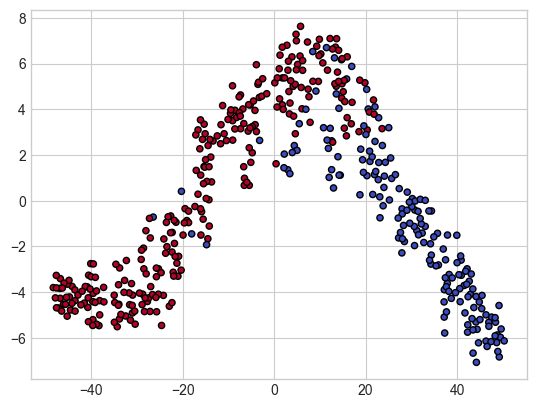

In [122]:
plt.scatter(x_comp[:, 0], x_comp[:, 1],
            c=y_train, 
            cmap = plt.cm.coolwarm,
            s=20, edgecolors='k')

In [123]:
# 2차원 데이터로 학습
model = KNeighborsClassifier()
model.fit(x_comp, y_train)
predict = model.predict(x_comp)

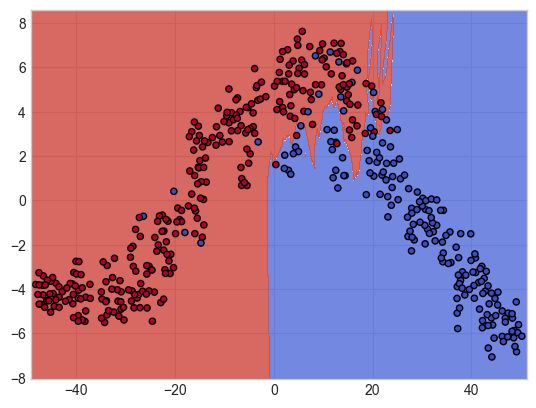

In [125]:
xx, yy = make_meshgrid(x_comp[:, 0], x_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=.8)
plt.scatter(x_comp[:, 0], x_comp[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

### 와인 데이터

In [60]:
wine = load_wine()

In [61]:
wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df['target'] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [76]:
x, y = wine.data, wine.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)
model.fit(x_train, y_train) #(KNN)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.7605633802816901
Test Data Score: 0.6944444444444444


In [77]:
#정규화 한걸로 학습... 스케일링 안한게나음
print(f'Train Data Score: {model.score(x_train_scale, y_train)}')
print(f'Test Data Score: {model.score(x_test_scale, y_test)}')

Train Data Score: 0.44366197183098594
Test Data Score: 0.2222222222222222


In [78]:
cross_validate(estimator = KNeighborsClassifier(), 
               X=x, y=y, cv=5, 
               n_jobs=multiprocessing.cpu_count())

{'fit_time': array([0.00038075, 0.00035572, 0.00040293, 0.00046396, 0.00035405]),
 'score_time': array([0.00082994, 0.000844  , 0.00085878, 0.000916  , 0.00076222]),
 'test_score': array([0.72222222, 0.66666667, 0.63888889, 0.65714286, 0.77142857])}

In [79]:
param_grid = [{'n_neighbors':[3,5,7],
               'weights': ['uniform', 'distance'],
               'algorithm': ['ball_tree', 'kd_tree', 'brute']}]

gs = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose = True 
)

gs.fit(x,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=8,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [81]:
gs.best_estimator_
print(f'GridSearchCV best score: {gs.best_score_}')

GridSearchCV best score: 0.7250793650793651


In [82]:
# 2차원으로 차원축소후 KNeighborsClassifier 를 이용해 학습 결과를 확인해 보자. 
tsne = TSNE(n_components=2) 
x_comp = tsne.fit_transform(x)
wine_comp_df = pd.DataFrame(data=x_comp)
wine_comp_df['Target'] = y
wine_comp_df

,0,1,Target
0,10.776262,-0.487612,0
1,10.432003,-0.650546,0
2,12.985907,-0.837710,0
3,15.823071,-0.589132,0
4,2.084576,-0.622652,0
...,...,...,...
173,2.049382,-1.025591,2
174,2.485284,-0.999561,2
175,5.089700,-0.840400,2
176,5.249944,-0.763763,2


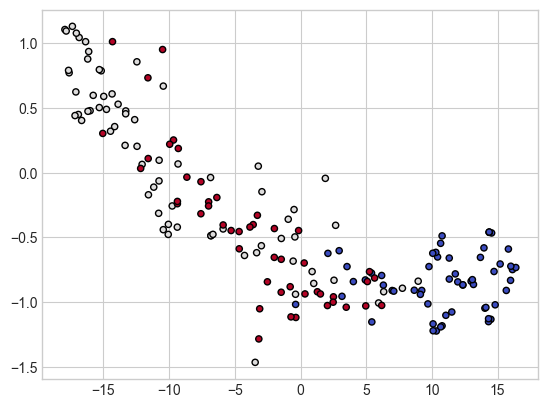

In [83]:
plt.scatter(x_comp[:, 0], x_comp[:, 1],
            c=y, 
            cmap = plt.cm.coolwarm,
            s=20, edgecolors='k')

In [90]:
# 2차원 데이터로 학습
model = KNeighborsClassifier()
model.fit(x_comp, y)
predict = model.predict(x_comp)

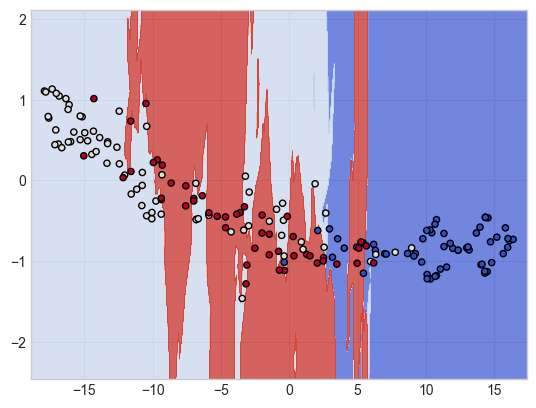

In [91]:
xx, yy = make_meshgrid(x_comp[:, 0], x_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=.8)
plt.scatter(x_comp[:, 0], x_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

## k 최근접 이웃 회귀

- 주변데이터의 평균을 이용해 예측값을 결정
- 데이터 범위 밖의 새로운 데이터는 예측 불가능

### 보스턴 주택 가격 데이터

In [ ]:
boston = load_boston()

In [ ]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['TARGET'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
x, y = boston.data, boston.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [ ]:
boston_train_df = pd.DataFrame(x_train, columns = boston.feature_names)
boston_train_df['TARGET'] = y_train
boston_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0
1,2.63548,0.0,9.90,0.0,0.544,4.973,37.8,2.5194,4.0,304.0,18.4,350.45,12.64,16.1
2,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16,22.9
3,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68,32.0
4,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,384.0,20.9,395.24,12.27,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.09068,45.0,3.44,0.0,0.437,6.951,21.5,6.4798,5.0,398.0,15.2,377.68,5.10,37.0
400,8.64476,0.0,18.10,0.0,0.693,6.193,92.6,1.7912,24.0,666.0,20.2,396.90,15.17,13.8
401,2.81838,0.0,18.10,0.0,0.532,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42,21.8
402,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25,20.9


In [ ]:
boston_test_df = pd.DataFrame(data=x_test, columns = boston.feature_names)
boston_test_df['TARGET'] = y_test
boston_test_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.12816,12.5,6.07,0.0,0.4090,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79,20.9
1,0.97617,0.0,21.89,0.0,0.6240,5.757,98.4,2.3460,4.0,437.0,21.2,262.76,17.31,15.6
2,0.20746,0.0,27.74,0.0,0.6090,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1
3,0.36894,22.0,5.86,0.0,0.4310,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,42.8
4,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4


In [ ]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [ ]:
model = KNeighborsRegressor()
model.fit(x_train, y_train)

print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.7106571750171307
Test Data Score: 0.4427254124022203


In [ ]:
model = KNeighborsRegressor()
model.fit(x_train_scale, y_train)

print(f'Train Data Score: {model.score(x_train_scale, y_train)}')
print(f'Test Data Score: {model.score(x_test_scale, y_test)}')

Train Data Score: 0.8357821014149374
Test Data Score: 0.778800023599149


In [ ]:
estimator = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [ ]:
cross_validate(
    estimator = estimator,
    X=x, y=y,
    cv=5, 
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    2.6s remaining:    3.9s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    2.7s finished


{'fit_time': array([0.00307155, 0.00291491, 0.0018611 , 0.00500464, 0.00297236]),
 'score_time': array([0.00444841, 0.00460172, 0.00218534, 0.00459862, 0.00369167]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsRegressor())])

In [ ]:
param_grid = [{'model__n_neighbors': [3,5,7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm':['ball_tree', 'kd_tree', 'brute']}]

In [ ]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
gs.fit(x, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [ ]:
print(f'GridSearchCV best score: {gs.best_score_}')

GridSearchCV best score: 0.4973060611762845


In [ ]:
tsne = TSNE(n_components=1)
x_comp = tsne.fit_transform(x)

In [ ]:
boston_comp_df = pd.DataFrame(data=x_comp)
boston_comp_df['target']=y
boston_comp_df.head()

,0,target
0,-24.048368,24.0
1,-45.455139,21.6
2,-41.641357,34.7
3,-42.616261,33.4
4,-42.883396,36.2


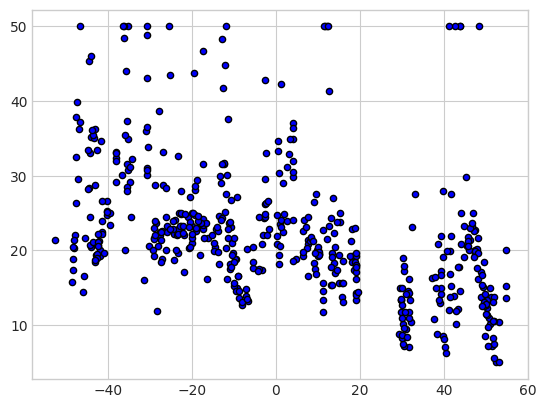

In [ ]:
plt.scatter(x_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [ ]:
model = KNeighborsRegressor()
model.fit(x_comp, y)
predict = model.predict(x_comp)

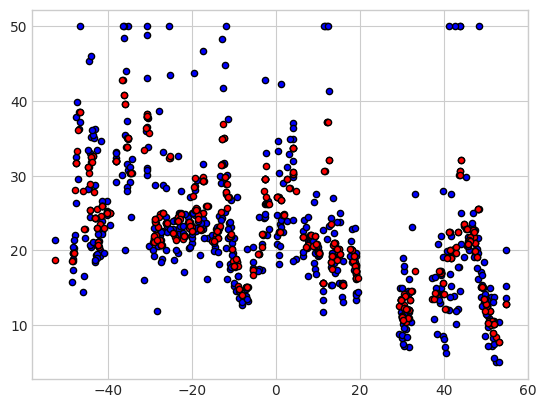

In [ ]:
plt.scatter(x_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(x_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

### 캘리포니아 주택 가격 데이터

In [126]:
california = fetch_california_housing()

In [127]:
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['TARGET'] = california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [128]:
x, y = california.data, california.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [129]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [130]:
model = KNeighborsRegressor()
model.fit(x_train, y_train)

print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.4558071127007527
Test Data Score: 0.1354032017933533


In [131]:
model = KNeighborsRegressor()
model.fit(x_train_scale, y_train)

print(f'Train Data Score: {model.score(x_train_scale, y_train)}')
print(f'Test Data Score: {model.score(x_test_scale, y_test)}')

Train Data Score: 0.7974389568385076
Test Data Score: 0.6552770158617771


In [132]:
estimator = make_pipeline(StandardScaler(), KNeighborsRegressor())
cross_validate(
    estimator = estimator,
    X=x, y=y,
    cv=5, 
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    1.9s remaining:    2.8s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    1.9s finished


{'fit_time': array([0.005898  , 0.00602388, 0.00601482, 0.01117992, 0.00572419]),
 'score_time': array([0.16450596, 0.13581896, 0.13935208, 0.17302084, 0.16570973]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [133]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsRegressor())])

param_grid = [{'model__n_neighbors': [3,5,7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm':['ball_tree', 'kd_tree', 'brute']}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

gs.fit(x_train_scale, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [134]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [135]:
print(f'GridSearchCV best score: {gs.best_score_}')

GridSearchCV best score: 0.6964088760530392


In [138]:
tsne = TSNE(n_components=1)
x_comp = tsne.fit_transform(x)

cal_comp_df = pd.DataFrame(data=x_comp)
cal_comp_df['target']=y
cal_comp_df.head()

,0,target
0,-116.784935,4.526
1,89.223648,3.585
2,-98.744530,3.521
3,-90.634514,3.413
4,-89.940598,3.422


In [142]:
model = gs.best_estimator_
model.fit(x_comp, y)
predict = model.predict(x_comp)

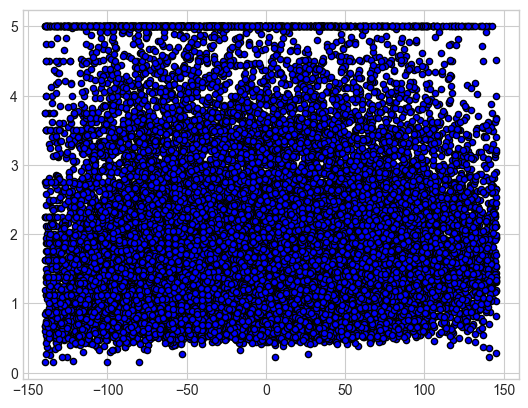

In [140]:
plt.scatter(x_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

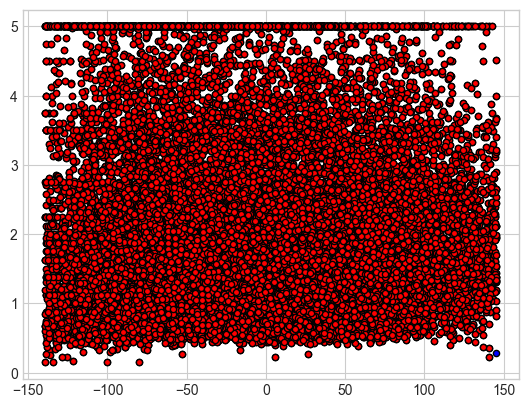

In [144]:
plt.scatter(x_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(x_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

### cf. 최적 k값 찾기(보스턴 주택 가격 데이터)

In [ ]:
boston = load_boston()
x, y = boston.data, boston.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [ ]:
model =KNeighborsRegressor()
model.fit(x_train, y_train)

print('scale 전 Train Data Score: {model.score(x_train, y_train)}')
print('scale 전 Test Data Score: {model.score(x_test, y_test)}')

scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

model =KNeighborsRegressor()
model.fit(x_train_scale, y_train)

print('scale 후 Train Data Score: {model.score(x_train_scale, y_train)}')
print('scale 후 Test Data Score: {model.score(x_test_scale, y_test)}')

scale 전 Train Data Score: {model.score(x_train, y_train)}
scale 전 Test Data Score: {model.score(x_test, y_test)}
scale 후 Train Data Score: {model.score(x_train_scale, y_train)}
scale 후 Test Data Score: {model.score(x_test_scale, y_test)}


Text(0, 0.5, 'test score(accuracy)')

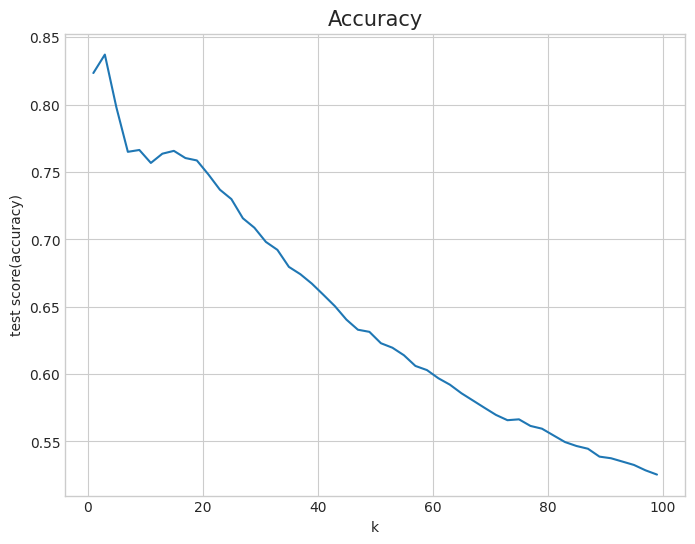

In [ ]:
k_list = range(1,101, 2)
accuracies = []

for k in k_list:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train_scale, y_train)
    accuracies.append(model.score(x_test_scale, y_test))
    
plt.figure(figsize=(8,6))    
plt.plot(k_list, accuracies)
plt.title('Accuracy', fontsize=15)
plt.xlabel('k')
plt.ylabel('test score(accuracy)')
#k가 커질수록 정확도는 감소

In [ ]:
df = pd.DataFrame(k_list, accuracies).reset_index()
df.columns = ['accuracy', 'k']
df.sort_values(by='accuracy', ascending=False)

,accuracy,k
1,0.837058,3
0,0.823363,1
2,0.797985,5
4,0.766270,9
7,0.765618,15
3,0.764900,7
6,0.763514,13
8,0.760295,17
9,0.758504,19
5,0.756656,11
